### Gradient Boosting

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
import pandas as pd

df = pd.read_csv("drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [5]:
### check for the missing data 
s=df.isna().sum()
s[s>0]

Series([], dtype: int64)

#### Seperate X and Y features

In [7]:
X = df.drop(columns=['Drug'])
Y = df[['Drug']]

In [8]:
X.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [9]:
Y.head()

,Drug
0,DrugY
1,drugC
2,drugC
3,drugX
4,DrugY


In [10]:
Y['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

<Axes: xlabel='Drug'>

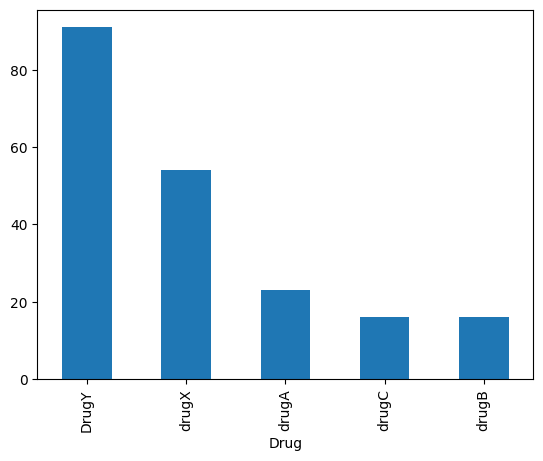

In [11]:
Y['Drug'].value_counts().plot(kind='bar')

#### For Y apply label encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['Drug'] = le.fit_transform(Y["Drug"])
Y.head()

,Drug
0,0
1,3
2,3
3,4
4,0


In [14]:
Y.value_counts()

Drug
0       91
4       54
1       23
2       16
3       16
Name: count, dtype: int64

#### Apply Preprocessing for the X

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [24]:
### Seperate cat and con features
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [25]:
cat

['Sex', 'BP', 'Cholesterol']

In [26]:
con

['Age', 'Na_to_K']

In [29]:
## Num Pipeline
num_pip = Pipeline(steps=[('impute',SimpleImputer(strategy='median')),
                          ('scaler',StandardScaler())])
## Cat pipeline
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])

## combine num and cat pipeline

pre = ColumnTransformer([('num',num_pip,con),
                         ('cat',cat_pipe,cat)])

In [30]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Age', 'Na_to_K']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Sex', 'BP', 'Cholesterol'])])

In [31]:
X_pre = pre.fit_transform(X)
X_pre

array([[-1.29159102,  1.28652212,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.4151454 ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.16269866, -0.82855818,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.46567567, -0.85908883,  0.        , ...,  1.        ,
         1.        ,  0.        ],
       [-1.29159102, -0.28650033,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [-0.26146916, -0.6571702 ,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [32]:
cols = pre.get_feature_names_out()
cols

array(['num__Age', 'num__Na_to_K', 'cat__Sex_F', 'cat__Sex_M',
       'cat__BP_HIGH', 'cat__BP_LOW', 'cat__BP_NORMAL',
       'cat__Cholesterol_HIGH', 'cat__Cholesterol_NORMAL'], dtype=object)

In [33]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__Age,num__Na_to_K,cat__Sex_F,cat__Sex_M,cat__BP_HIGH,cat__BP_LOW,cat__BP_NORMAL,cat__Cholesterol_HIGH,cat__Cholesterol_NORMAL
0,-1.291591,1.286522,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.162699,-0.415145,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,0.162699,-0.828558,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.988614,-1.149963,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.011034,0.271794,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
195,0.708057,-0.626917,1.0,0.0,0.0,1.0,0.0,1.0,0.0
196,-1.715759,-0.565995,0.0,1.0,0.0,1.0,0.0,1.0,0.0
197,0.465676,-0.859089,0.0,1.0,0.0,0.0,1.0,1.0,0.0
198,-1.291591,-0.286500,0.0,1.0,0.0,0.0,1.0,0.0,1.0


### Train test split

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.30,random_state=42)

In [36]:
xtrain.shape

(140, 9)

In [37]:
xtest.shape

(60, 9)

### Create Gradient Boosting Model
Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(learning_rate=0.5,n_estimators=1,max_depth=10,min_samples_split=2,min_samples_leaf=2)
model.fit(xtrain,ytrain)


GradientBoostingClassifier(learning_rate=0.5, max_depth=10, min_samples_leaf=2,
                           n_estimators=1)

In [39]:
model.score(xtrain,ytrain)

1.0

In [40]:
model.score(xtest,ytest)

0.9666666666666667

### hyper parameter tunning

In [41]:
params = {'learning_rate':[0.01,0.1,0.15,0.2],
          'n_estimators' : [10,20,30,50,100,200],
         'max_depth' : [2,3,4,5,6,7,8,9,10,11],
           'min_samples_split':[3,4,5,6,7,8,9,10,11],
            }

In [42]:
params

{'learning_rate': [0.01, 0.1, 0.15, 0.2],
 'n_estimators': [10, 20, 30, 50, 100, 200],
 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10, 11]}

In [43]:
from sklearn.model_selection import RandomizedSearchCV
gbc = GradientBoostingClassifier()
rscv = RandomizedSearchCV(gbc,param_distributions=params,cv=5,scoring='f1_macro')
rscv

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [10, 20, 30, 50, 100,
                                                         200]},
                   scoring='f1_macro')

In [45]:
rscv.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11],
                                        'min_samples_split': [3, 4, 5, 6, 7, 8,
                                                              9, 10, 11],
                                        'n_estimators': [10, 20, 30, 50, 100,
                                                         200]},
                   scoring='f1_macro')

In [47]:
best_params =rscv.best_params_
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'max_depth': 2,
 'learning_rate': 0.01}

In [48]:
best_score = rscv.best_score_
best_score

0.9862857142857143

In [49]:
best_gbc = rscv.best_estimator_
best_gbc

GradientBoostingClassifier(learning_rate=0.01, max_depth=2,
                           min_samples_split=10, n_estimators=200)

## Evaluate the model in train and test

In [52]:
best_gbc.score(xtrain,ytrain)

1.0

In [53]:
best_gbc.score(xtest,ytest)

0.9833333333333333

### Predict date form train and test

Check confusion matrix

In [60]:
ypred_tr = best_gbc.predict(xtrain)
ypred_ts = best_gbc.predict(xtest)

In [56]:
ypred_tr[:5]

array([1, 0, 2, 0, 4], dtype=int64)

In [57]:
ytrain.head(5)

,Drug
169,1
97,0
31,2
12,0
35,4


In [58]:
ypred_ts[:5]

array([4, 0, 4, 3, 0], dtype=int64)

In [59]:
ytest.head(5)

,Drug
95,4
15,0
30,4
158,3
128,0


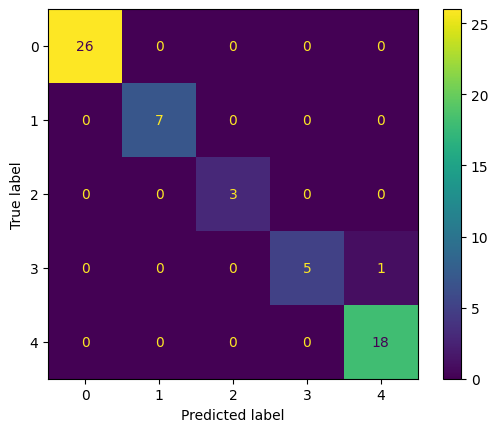

In [64]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cf = confusion_matrix(ytest,ypred_ts)
cfd = ConfusionMatrixDisplay(cf,display_labels=best_gbc.classes_)
cfd.plot()